## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models as sm 
import sys
import cv2
sys.path.append("../src/")
from pix2pix_model import build_generator
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from unet_utils import *

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


## Aux Functions

In [3]:
imread_unet=lambda img_path,pad=0: cv2.copyMakeBorder(plt.imread(img_path)/255,pad,pad,pad,pad,cv2.BORDER_CONSTANT)
preprocessing_unet=lambda img: np.array([cv2.resize(img.copy(),(512,832))])

In [4]:
preprocessing_generator=lambda img: np.array([cv2.resize(img,(256,256))/127.5-1])

## Load Unet

In [5]:
unet = Unet('resnet34',classes=3, encoder_weights='imagenet',activation="softmax",    encoder_freeze=False,)
unet.load_weights("../data/logs/Unet-Segmantic/DreesUp_unet.h5") #load weights

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


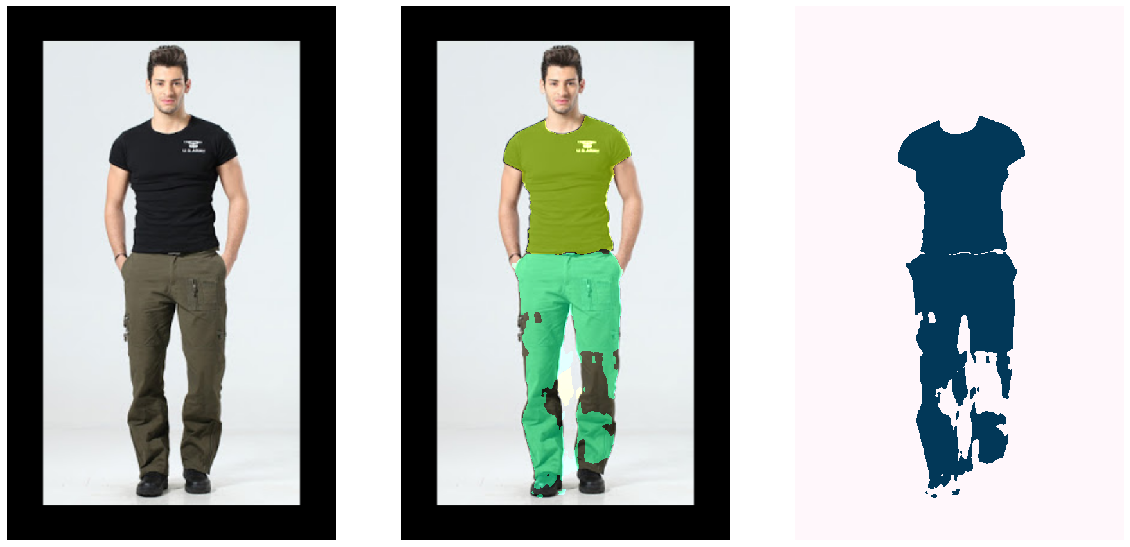

In [6]:
img=imread_unet("../img/test_3.jpg",pad=30)[...,:3] 
show_out(img,unet) #Display segmentation

In [7]:
clothes_to_change={'playera_blanca': (255, 0, 0),
                    'pantalon_playera_negra': (0, 255, 0),
                    'playera_rayas': (0, 0, 255),
                    'sudadera_azul': (255, 255, 0),
                    'playera_tigre': (255, 0, 255)} 

In [8]:
clothes='playera_rayas' #Select color
(r,g,b)=clothes_to_change[clothes]

## Load pix2pix Generator

In [9]:
generator=build_generator()
generator.load_weights(f"../data/logs/Pix2Pix/{clothes}/generator_{clothes}.h5")

In [10]:
shirt=unet.predict(preprocessing_unet(img))[...,1].round()[0]

In [11]:
shirt_rgb=cv2.cvtColor(shirt,cv2.COLOR_GRAY2RGB)
shirt_rgb[(shirt_rgb[...,0]==1)&(shirt_rgb[...,1]==1)&(shirt_rgb[...,2]==1)]=(r,g,b)

In [12]:
shirt_rgb=shirt_rgb.astype(np.float)

In [13]:
h,w,_=np.where(shirt_rgb!=0)

In [21]:
max_h=max(h) if max(h)<shirt_rgb.shape[0]//2 else shirt_rgb.shape[0]//2
shirt_segment=shirt_rgb[min(h):max_h,min(w):max(w)].copy()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 196.5, 243.5, -0.5)

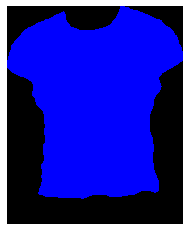

In [22]:
# plt.subplots(figsize=(10,10))
plt.imshow(shirt_segment)
plt.axis("off")

In [23]:
shirt_change=cv2.resize(generator.predict(preprocessing_generator(shirt_segment))[0]*.5+.5,shirt_segment.shape[:2][::-1])

(-0.5, 196.5, 243.5, -0.5)

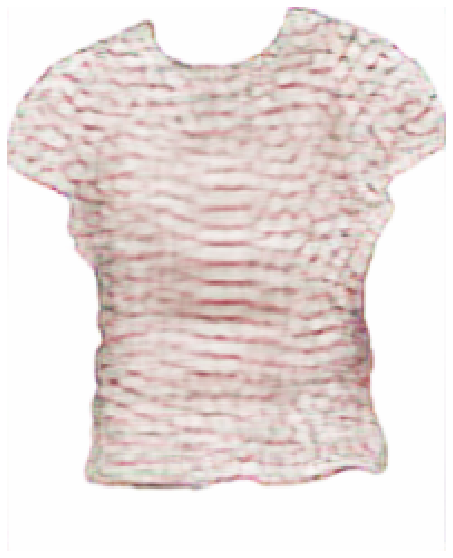

In [24]:
plt.subplots(figsize=(10,10))
plt.imshow(shirt_change)
plt.axis("off")

In [25]:
img=cv2.resize(img.copy(),(512,832))

In [26]:
img.shape

(832, 512, 3)

In [27]:
shirt_segment.shape

(244, 197, 3)

In [28]:
shirt_change.shape

(244, 197, 3)

In [29]:
shirt_rgb.shape

(832, 512, 3)

In [30]:
img[min(h):max_h,min(w):max(w)][((shirt_segment[...,0]==r)&(shirt_segment[...,1]==g)&(shirt_segment[...,2]==b))]=shirt_change[((shirt_segment[...,0]==r)&(shirt_segment[...,1]==g)&(shirt_segment[...,2]==b))]

(-0.5, 511.5, 831.5, -0.5)

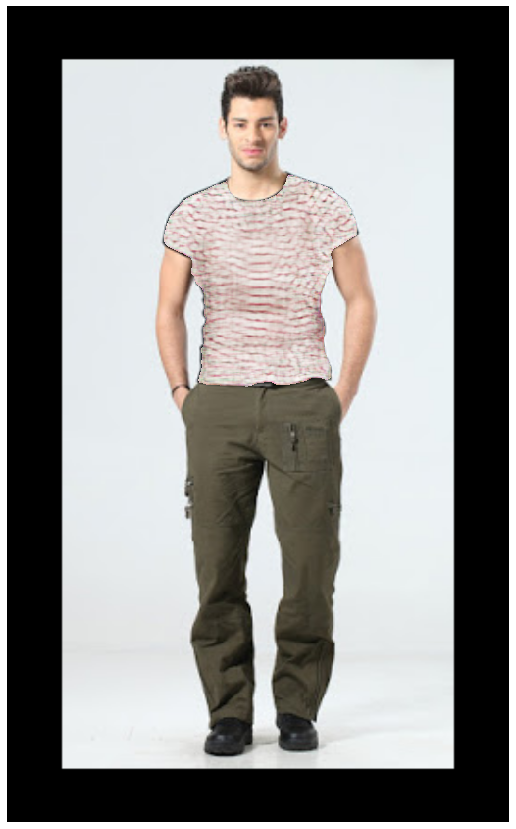

In [31]:
plt.subplots(figsize=(15,15))
plt.imshow(img)
plt.axis("off")